Nothing done.
3


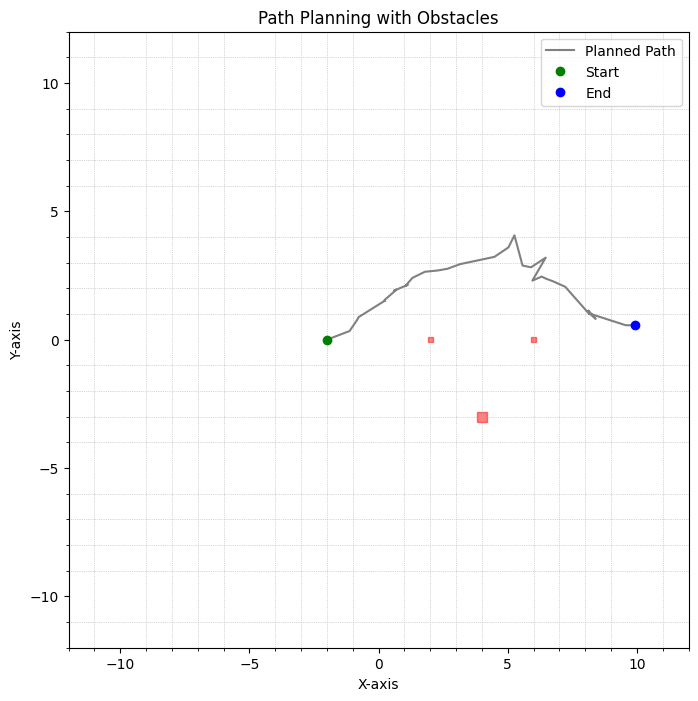

In [27]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from obstacles import static_obstacles
from mpscenes.obstacles.box_obstacle import BoxObstacle
from mpscenes.obstacles.dynamic_sphere_obstacle import DynamicSphereObstacle

# Load the path data from the generated text file
path_data = np.genfromtxt('path_output.txt', delimiter=', ')

# Extract x, y coordinates from the path data
x_path = path_data[:, 0]
y_path = path_data[:, 1]

# Plot the path
plt.figure(figsize=(8, 8))
plt.plot(x_path, y_path, label='Planned Path', color='gray')
plt.plot(x_path[0], y_path[0], 'go', label = 'Start')
plt.plot(x_path[-1], y_path[-1], 'bo', label = 'End')

print(len(static_obstacles))
# Plot obstacles
for obstacle in static_obstacles:
    if isinstance(obstacle, DynamicSphereObstacle):
        obstacle_position = np.array([obstacle.geometry['trajectory']['controlPoints'][0][0],
                                                obstacle.geometry['trajectory']['controlPoints'][0][1]])
        obstacle_radius = obstacle.geometry['radius']
        circle = plt.Circle((obstacle_position[0], obstacle_position[1]), obstacle_radius, color='red', alpha=0.5)
        plt.gca().add_patch(circle)
    elif isinstance(obstacle, BoxObstacle):
        obstacle_position = np.array([obstacle.position()[0], obstacle.position()[1]])
        obstacle_width = obstacle.width()
        obstacle_height = obstacle.height()
        rect = plt.Rectangle((obstacle_position[0] - obstacle_width / 2, obstacle_position[1] - obstacle_height / 2),
                             obstacle_width, obstacle_height, color='red', alpha=0.5)
        plt.gca().add_patch(rect)

# Set plot limits and labels
plt.xlim([-12, 12])
plt.ylim([-12, 12])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Path Planning with Obstacles')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()
